In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [15]:
df = pd.read_csv('/content/ushape.csv')
df.sample(5)
df.columns=['x','y','class']
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


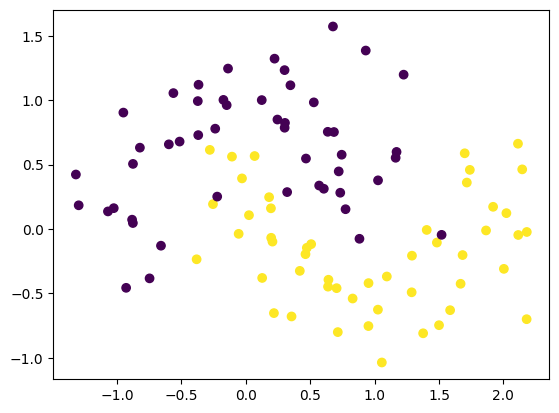

In [16]:
plt.scatter(df['x'],df['y'], c= df['class'])

In [17]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values
#

In [19]:
model = Sequential()
model.add(Dense(10,activation = 'sigmoid', input_dim = 2))
model.add(Dense(1,activation  = 'sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.get_weights()

[array([[-0.6653197 , -0.1484577 ,  0.33819383, -0.46117148,  0.57769257,
         -0.01588029,  0.20347333,  0.5837156 ,  0.1140219 ,  0.18715614],
        [-0.2773522 , -0.20554394, -0.16635936, -0.5923606 , -0.05621427,
          0.42884415, -0.5622737 , -0.01587808,  0.5267771 , -0.18235612]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.45555976],
        [-0.33992252],
        [ 0.03021455],
        [-0.7201732 ],
        [-0.6057307 ],
        [-0.5178617 ],
        [-0.12404519],
        [ 0.4657759 ],
        [-0.53408855],
        [-0.67010325]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
initial_weights = model.get_weights()

In [23]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [24]:
model.set_weights(initial_weights)

In [25]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [27]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

In [28]:
history = model.fit(x,y,epochs = 100, validation_split = 0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4057 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4914 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5305 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5188 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4993 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [29]:
model.get_weights()

[array([[ 0.41908062,  0.41908062,  0.41908062,  0.41908062,  0.41908062,
          0.41908062,  0.41908062,  0.41908062,  0.41908062,  0.41908062],
        [-0.46009082, -0.46009082, -0.46009082, -0.46009082, -0.46009082,
         -0.46009082, -0.46009082, -0.46009082, -0.46009082, -0.46009082]],
       dtype=float32),
 array([-0.11332612, -0.11332612, -0.11332612, -0.11332612, -0.11332612,
        -0.11332612, -0.11332612, -0.11332612, -0.11332612, -0.11332612],
       dtype=float32),
 array([[0.05616415],
        [0.05616415],
        [0.05616415],
        [0.05616415],
        [0.05616416],
        [0.05616416],
        [0.05616416],
        [0.05616416],
        [0.05616416],
        [0.05616416]], dtype=float32),
 array([-0.05685387], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

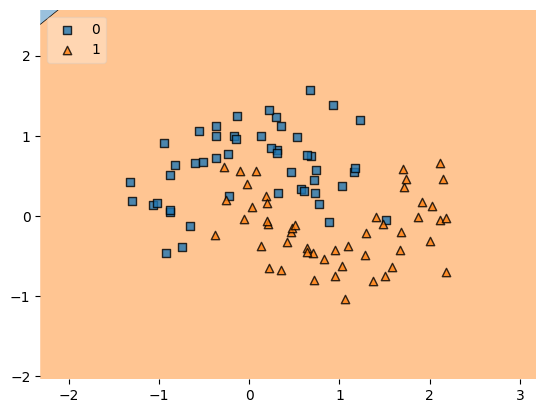

In [30]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf = model,legend = 2)